In [46]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install tensorflow


  Obtaining dependency information for numpy<2.1.0,>=1.26.0 from https://files.pythonhosted.org/packages/fa/66/f7177ab331876200ac7563a580140643d1179c8b4b6a6b0fc9838de2a9b8/numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.3 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 5.28.3 which is incompatible.
cupy-cuda12x 12.1.0 requires numpy<1.27,>=

In [51]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [52]:
import tensorflow as tf

# Configure GPU options for TensorFlow 2.x
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)


In [53]:
pip install --upgrade numpy scipy scikit-learn

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/05/db/5d9c91b2e1e2e72be1369278f696356d44975befcae830daf2e667dcb54f/numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.3 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 5.28.3 which is incompatible.
cupy-cuda12x 12.1.0 requires numpy<1.27,>=1.20, but you h

In [55]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf


In [56]:
pip install os


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [57]:
my_data_dir = 'dataset/cell_images'
os.listdir(my_data_dir)

['test', 'train']

In [58]:
test_path = my_data_dir+'/test/'


In [59]:
train_path = my_data_dir+'/train/'


In [60]:
os.listdir(train_path)


['parasitized', 'uninfected']

In [61]:
len(os.listdir(train_path+'/uninfected/'))


12479

In [62]:
len(os.listdir(train_path+'/parasitized/'))


12479

In [63]:
os.listdir(train_path+'/parasitized')[0]


'C182P143NThinF_IMG_20151201_172257_cell_157.png'

In [64]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])

SASIDEVI V - 212222230136


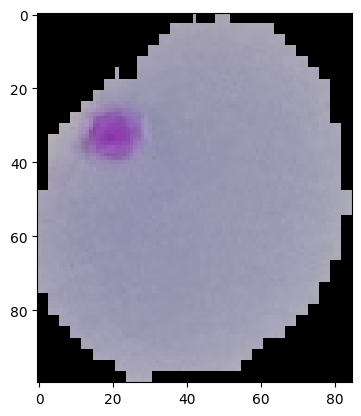

In [65]:
plt.imshow(para_img)
print('SASIDEVI V - 212222230136')

In [66]:
# Checking the image dimensions
dim1 = []
dim2 = []


In [67]:
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


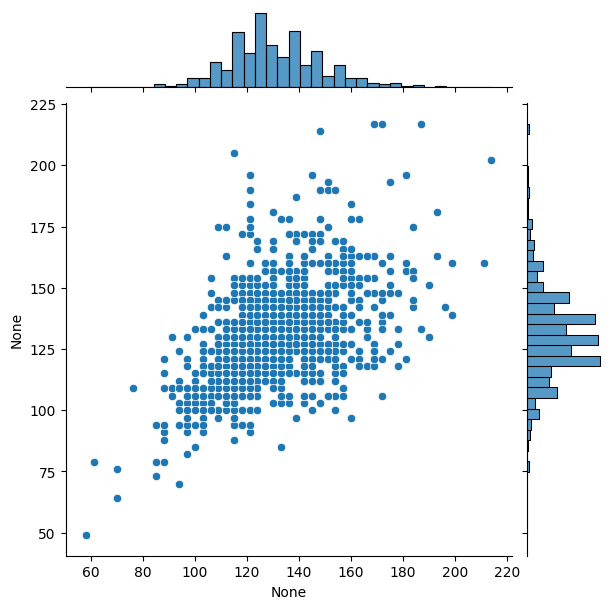

In [68]:
sns.jointplot(x=dim1,y=dim2)


In [69]:
image_shape = (130,130,3)


In [70]:
help(ImageDataGenerator)


Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  DEPRECATED.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_

In [71]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [72]:
image_gen.flow_from_directory(train_path)


Found 24958 images belonging to 2 classes.


In [73]:
image_gen.flow_from_directory(test_path)


Found 2600 images belonging to 2 classes.


In [74]:
model = models.Sequential()
model.add(keras.Input(shape=(image_shape)))
# Add convolutional layers
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Flatten the layer
model.add(layers.Flatten())
# Add a dense layer
model.add(layers.Dense(128, activation='relu'))
# Output layer
model.add(layers.Dense(1,activation='sigmoid'))

In [75]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
model.summary()
print("SASIDEVI V - 212222230136 ")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,465 (3.14 MB)

 Trainable params: 822,465 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

SASIDEVI V - 212222230136 


In [77]:
batch_size = 16
help(image_gen.flow_from_directory)
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Help on method flow_from_directory in module keras.src.legacy.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.legacy.preprocessing.image.ImageDataGenerator instance

Found 24958 images belonging to 2 classes.


In [78]:
train_image_gen.batch_size

16

In [79]:
len(train_image_gen.classes)

24958

In [80]:
train_image_gen.total_batches_seen

0

In [81]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [82]:
train_image_gen.class_indices


{'parasitized': 0, 'uninfected': 1}

In [83]:
results = model.fit(train_image_gen,epochs=3,
                              validation_data=test_image_gen
                             )

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.7107 - loss: 0.5339 - val_accuracy: 0.9358 - val_loss: 0.2041
Epoch 2/3
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.9399 - loss: 0.1866 - val_accuracy: 0.9408 - val_loss: 0.2013
Epoch 3/3
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.9460 - loss: 0.1709 - val_accuracy: 0.9450 - val_loss: 0.1640


In [84]:
model.save('cell_modelsasi.h5')


SASIDEVI 
212222230136


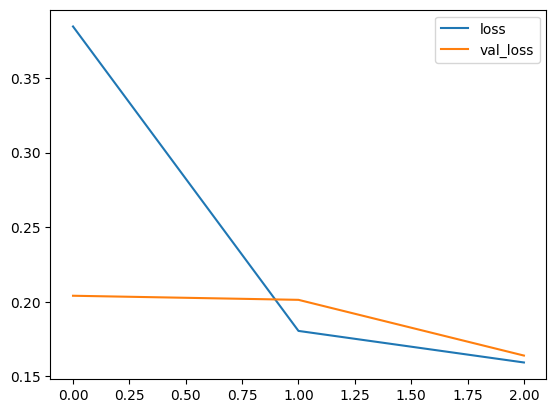

In [85]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
print("SASIDEVI \n212222230136")

In [86]:
model.metrics_names
model.evaluate(test_image_gen)


163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9206 - loss: 0.1665


[0.16627976298332214, 0.943461537361145]

In [87]:
pred_probabilities = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step


In [88]:
test_image_gen.classes
predictions = pred_probabilities > 0.5


In [89]:
print(classification_report(test_image_gen.classes,predictions))
print('SASIDEVI V \n212222230136')

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600

SASIDEVI V 
212222230136


In [90]:
print(confusion_matrix(test_image_gen.classes,predictions))
print('SASIDEVI V \n212222230136')

[[1189  111]
 [  35 1265]]
SASIDEVI V 
212222230136


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
SANDHIYA R - 212222230129


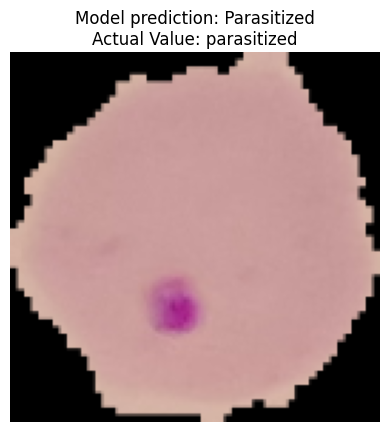

In [93]:
import random
import tensorflow as tf

list_dir=["UnInfected","parasitized"]
dir_=(list_dir[1])
para_img= imread(train_path+
                 '/'+dir_+'/'+
                 os.listdir(train_path+'/'+dir_)[random.randint(0,100)])
img  = tf.convert_to_tensor(np.asarray(para_img))
img = tf.image.resize(img,(130,130))
img=img.numpy()
pred=bool(model.predict(img.reshape(1,130,130,3))<0.5 )
plt.title("Model prediction: "+("Parasitized" if pred
    else "Un Infected")+"\nActual Value: "+str(dir_))
plt.axis("off")
print("SANDHIYA R - 212222230129")
plt.imshow(img)
plt.show()